In [1]:
import pandas as pd
import numpy as np
import datetime
import time
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('face_record.xlsx') 

In [3]:
df.head()

,student_id,部门,日期,考勤状态,考勤点,自定义名称,数据来源,处理类型,体温,体温异常
0,'10000869,PHBS/2018-2020,2021-09-17 10:08:00,无,335_门1_进门读卡器1,-,原始记录,-,-,-
1,'10000458,PHBS/2018-2020,2021-09-17 10:11:00,无,335_门1_进门读卡器1,-,原始记录,-,-,-
2,'10001026,PHBS/2018-2020,2021-09-17 10:18:00,无,335_门1_进门读卡器1,-,原始记录,-,-,-
3,'10000922,PHBS/2018-2020,2021-09-17 10:23:00,无,335_门1_进门读卡器1,-,原始记录,-,-,-
4,'10000832,PHBS/2018-2020,2021-09-17 10:24:00,无,335_门1_进门读卡器1,-,原始记录,-,-,-


## Data Overview

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1381 entries, 0 to 1380
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   student_id  1381 non-null   object        
 1   部门          1381 non-null   object        
 2   日期          1381 non-null   datetime64[ns]
 3   考勤状态        1381 non-null   object        
 4   考勤点         1381 non-null   object        
 5   自定义名称       1381 non-null   object        
 6   数据来源        1381 non-null   object        
 7   处理类型        1381 non-null   object        
 8   体温          1381 non-null   object        
 9   体温异常        1381 non-null   object        
dtypes: datetime64[ns](1), object(9)
memory usage: 108.0+ KB


**查看数据的统计信息
include='all': 数值型和离散型特征的统计都进行显示**

In [5]:
df.describe(include='all', datetime_is_numeric=True)

,student_id,部门,日期,考勤状态,考勤点,自定义名称,数据来源,处理类型,体温,体温异常
count,1381,1381,1381,1381,1381,1381,1381,1381,1381,1381
unique,138,2,NaN,1,1,1,1,1,1,1
top,'10001030,PHBS/2018-2020,NaN,无,335_门1_进门读卡器1,-,原始记录,-,-,-
freq,36,1097,NaN,1381,1381,1381,1381,1381,1381,1381
mean,NaN,NaN,2021-10-19 19:09:41.361332480,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,2021-09-17 10:08:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,2021-10-12 09:58:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,2021-10-22 10:25:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,2021-11-02 10:20:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,2021-11-09 15:37:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


time
15:24:00    61
15:25:00    59
15:23:00    57
10:24:00    48
13:19:00    45
            ..
10:13:00     1
10:11:00     1
10:10:00     1
10:08:00     1
19:22:00     1
Name: student_id, Length: 184, dtype: int64

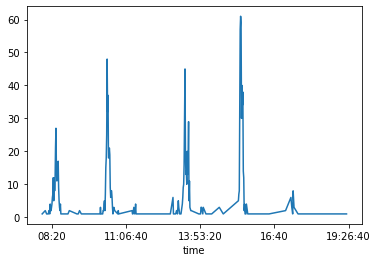

In [6]:
df["time"] = df["日期"].dt.time
df2 = df.groupby('time')["student_id"].count()
df2.plot()
df2.sort_values(ascending = False)

In [7]:
df['student_id'].value_counts()

'10001030    36
'10001024    28
'10000832    27
'10000821    26
'10001264    24
             ..
'10000583     1
'10001271     1
'10001301     1
'10001006     1
'10001179     1
Name: student_id, Length: 138, dtype: int64

In [9]:
df['student_id'].groupby(df['部门']).get_group('PHBS/2018-2020').value_counts()

'10001030    36
'10001024    28
'10000832    27
'10000821    26
'10000817    24
             ..
'10000796     1
'10000574     1
'10000932     1
'10000583     1
'10000978     1
Name: student_id, Length: 95, dtype: int64

In [10]:
df['student_id'].groupby(df['部门']).get_group('PHBS/2021').value_counts()

'10001264    24
'10001257    23
'10001177    17
'10001267    16
'10001191    13
'10001226     9
'10001202     9
'10001250     8
'10001214     8
'10001180     8
'10001207     8
'10001172     8
'10001195     7
'10001280     7
'10001190     7
'10001245     7
'10001159     7
'10001229     7
'10001241     7
'10001259     7
'10001211     7
'10001197     6
'10001157     6
'10001237     6
'10001154     6
'10001164     5
'10001149     5
'10001269     5
'10001173     4
'10001160     4
'10001166     4
'10001270     4
'10001109     3
'10001062     2
'10001327     2
'10001309     1
'10001271     1
'10001179     1
'10001294     1
'10001189     1
'10001288     1
'10001312     1
'10001301     1
Name: student_id, dtype: int64

我们可以看到，总共统计表中有138名学生，其中18~20级同学95名，21级同学43名。

In [11]:
df['部门'].value_counts()

PHBS/2018-2020    1097
PHBS/2021          284
Name: 部门, dtype: int64

总共签到次数，18~20级共计1097次，21级共计284次。

([<matplotlib.patches.Wedge at 0x7fdc3beca850>,
 [Text(-0.8783066307001035, 0.6622518119780662, 'PHBS/2018-2020'),
  Text(0.8783066617023476, -0.6622517708615644, 'PHBS/2021')],
 [Text(-0.47907634401823823, 0.3612282610789452, '79.4%'),
  Text(0.4790763609285532, -0.3612282386517624, '20.6%')])

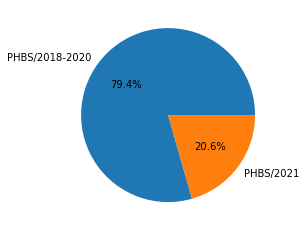

In [12]:
plt.pie(x=df['部门'].value_counts(), labels=['PHBS/2018-2020','PHBS/2021'], autopct='%1.1f%%')

上图为签到次数的饼状图。

## Data Process

- 筛选出打卡时间在统计范围之内的：周二和周五 15:10-15:50
- 如果连续多次打卡，取第一次即可
- 使用pivot函数对数据表进行重塑 -> 展示每个人的相应课程每次的考勤情况
- 展示每个人的attendance times

In [14]:
start = "2021-09-17"
end = "2021-11-09"
weekmask = "Tue Fri"
holidays = [datetime.datetime(2021, 9, 21), datetime.datetime(2021, 10, 1), datetime.datetime(2021, 10, 5)]
dataindex = pd.bdate_range(start, end, freq="C", weekmask=weekmask, holidays=holidays)
dataindex

DatetimeIndex(['2021-09-17', '2021-09-24', '2021-09-28', '2021-10-08',
               '2021-10-12', '2021-10-15', '2021-10-19', '2021-10-22',
               '2021-10-26', '2021-10-29', '2021-11-02', '2021-11-05',
               '2021-11-09'],
              dtype='datetime64[ns]', freq='C')

In [15]:
df = df[pd.to_datetime(df["日期"].dt.date).isin(dataindex) 
   & (df["日期"].dt.time >= datetime.time(15,10))
   & (df["日期"].dt.time <= datetime.time(15,50))]
df 

,student_id,部门,日期,考勤状态,考勤点,自定义名称,数据来源,处理类型,体温,体温异常,time
25,'10001030,PHBS/2018-2020,2021-09-17 15:20:00,无,335_门1_进门读卡器1,-,原始记录,-,-,-,15:20:00
26,'10001030,PHBS/2018-2020,2021-09-17 15:20:00,无,335_门1_进门读卡器1,-,原始记录,-,-,-,15:20:00
27,'10000818,PHBS/2018-2020,2021-09-17 15:22:00,无,335_门1_进门读卡器1,-,原始记录,-,-,-,15:22:00
28,'10000924,PHBS/2018-2020,2021-09-17 15:22:00,无,335_门1_进门读卡器1,-,原始记录,-,-,-,15:22:00
29,'10000808,PHBS/2018-2020,2021-09-17 15:22:00,无,335_门1_进门读卡器1,-,原始记录,-,-,-,15:22:00
...,...,...,...,...,...,...,...,...,...,...,...
1376,'10000783,PHBS/2018-2020,2021-11-09 15:30:00,无,335_门1_进门读卡器1,-,原始记录,-,-,-,15:30:00
1377,'10000832,PHBS/2018-2020,2021-11-09 15:33:00,无,335_门1_进门读卡器1,-,原始记录,-,-,-,15:33:00
1378,'10001042,PHBS/2018-2020,2021-11-09 15:33:00,无,335_门1_进门读卡器1,-,原始记录,-,-,-,15:33:00
1379,'10000970,PHBS/2018-2020,2021-11-09 15:37:00,无,335_门1_进门读卡器1,-,原始记录,-,-,-,15:37:00


In [16]:
df["day"] = df["日期"].dt.date
df

,student_id,部门,日期,考勤状态,考勤点,自定义名称,数据来源,处理类型,体温,体温异常,time,day
25,'10001030,PHBS/2018-2020,2021-09-17 15:20:00,无,335_门1_进门读卡器1,-,原始记录,-,-,-,15:20:00,2021-09-17
26,'10001030,PHBS/2018-2020,2021-09-17 15:20:00,无,335_门1_进门读卡器1,-,原始记录,-,-,-,15:20:00,2021-09-17
27,'10000818,PHBS/2018-2020,2021-09-17 15:22:00,无,335_门1_进门读卡器1,-,原始记录,-,-,-,15:22:00,2021-09-17
28,'10000924,PHBS/2018-2020,2021-09-17 15:22:00,无,335_门1_进门读卡器1,-,原始记录,-,-,-,15:22:00,2021-09-17
29,'10000808,PHBS/2018-2020,2021-09-17 15:22:00,无,335_门1_进门读卡器1,-,原始记录,-,-,-,15:22:00,2021-09-17
...,...,...,...,...,...,...,...,...,...,...,...,...
1376,'10000783,PHBS/2018-2020,2021-11-09 15:30:00,无,335_门1_进门读卡器1,-,原始记录,-,-,-,15:30:00,2021-11-09
1377,'10000832,PHBS/2018-2020,2021-11-09 15:33:00,无,335_门1_进门读卡器1,-,原始记录,-,-,-,15:33:00,2021-11-09
1378,'10001042,PHBS/2018-2020,2021-11-09 15:33:00,无,335_门1_进门读卡器1,-,原始记录,-,-,-,15:33:00,2021-11-09
1379,'10000970,PHBS/2018-2020,2021-11-09 15:37:00,无,335_门1_进门读卡器1,-,原始记录,-,-,-,15:37:00,2021-11-09


In [17]:
df.drop_duplicates(subset=["student_id","day"],keep="first",inplace=True)
df

,student_id,部门,日期,考勤状态,考勤点,自定义名称,数据来源,处理类型,体温,体温异常,time,day
25,'10001030,PHBS/2018-2020,2021-09-17 15:20:00,无,335_门1_进门读卡器1,-,原始记录,-,-,-,15:20:00,2021-09-17
27,'10000818,PHBS/2018-2020,2021-09-17 15:22:00,无,335_门1_进门读卡器1,-,原始记录,-,-,-,15:22:00,2021-09-17
28,'10000924,PHBS/2018-2020,2021-09-17 15:22:00,无,335_门1_进门读卡器1,-,原始记录,-,-,-,15:22:00,2021-09-17
29,'10000808,PHBS/2018-2020,2021-09-17 15:22:00,无,335_门1_进门读卡器1,-,原始记录,-,-,-,15:22:00,2021-09-17
30,'10000813,PHBS/2018-2020,2021-09-17 15:23:00,无,335_门1_进门读卡器1,-,原始记录,-,-,-,15:23:00,2021-09-17
...,...,...,...,...,...,...,...,...,...,...,...,...
1373,'10000876,PHBS/2018-2020,2021-11-09 15:28:00,无,335_门1_进门读卡器1,-,原始记录,-,-,-,15:28:00,2021-11-09
1374,'10000945,PHBS/2018-2020,2021-11-09 15:28:00,无,335_门1_进门读卡器1,-,原始记录,-,-,-,15:28:00,2021-11-09
1377,'10000832,PHBS/2018-2020,2021-11-09 15:33:00,无,335_门1_进门读卡器1,-,原始记录,-,-,-,15:33:00,2021-11-09
1378,'10001042,PHBS/2018-2020,2021-11-09 15:33:00,无,335_门1_进门读卡器1,-,原始记录,-,-,-,15:33:00,2021-11-09


In [18]:
df.pivot(index='student_id', columns='day', values='日期') 

day,2021-09-17,2021-09-24,2021-09-28,2021-10-08,2021-10-12,2021-10-15,2021-10-19,2021-10-22,2021-10-26,2021-10-29,2021-11-02,2021-11-05,2021-11-09
student_id,,,,,,,,,,,,,
'10000442,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2021-11-02 15:19:00,2021-11-05 15:40:00,2021-11-09 15:23:00
'10000771,2021-09-17 15:26:00,2021-09-24 15:27:00,2021-09-28 15:25:00,2021-10-08 15:24:00,2021-10-12 15:26:00,2021-10-15 15:27:00,2021-10-19 15:25:00,2021-10-22 15:26:00,2021-10-26 15:24:00,2021-10-29 15:24:00,2021-11-02 15:24:00,2021-11-05 15:28:00,2021-11-09 15:27:00
'10000783,2021-09-17 15:26:00,2021-09-24 15:24:00,2021-09-28 15:25:00,2021-10-08 15:25:00,2021-10-12 15:25:00,2021-10-15 15:27:00,2021-10-19 15:25:00,2021-10-22 15:26:00,2021-10-26 15:24:00,2021-10-29 15:24:00,2021-11-02 15:24:00,2021-11-05 15:28:00,2021-11-09 15:26:00
'10000796,2021-09-17 15:29:00,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
'10000801,2021-09-17 15:25:00,2021-09-24 15:24:00,2021-09-28 15:25:00,2021-10-08 15:24:00,2021-10-12 15:23:00,2021-10-15 15:25:00,2021-10-19 15:23:00,2021-10-22 15:23:00,2021-10-26 15:24:00,2021-10-29 15:23:00,2021-11-02 15:23:00,2021-11-05 15:28:00,2021-11-09 15:27:00
'10000808,2021-09-17 15:22:00,2021-09-24 15:23:00,2021-09-28 15:25:00,2021-10-08 15:23:00,2021-10-12 15:25:00,2021-10-15 15:25:00,2021-10-19 15:27:00,2021-10-22 15:25:00,2021-10-26 15:24:00,2021-10-29 15:25:00,2021-11-02 15:23:00,2021-11-05 15:22:00,2021-11-09 15:22:00
'10000813,2021-09-17 15:23:00,2021-09-24 15:26:00,2021-09-28 15:25:00,NaT,2021-10-12 15:25:00,2021-10-15 15:24:00,2021-10-19 15:22:00,2021-10-22 15:24:00,2021-10-26 15:23:00,2021-10-29 15:19:00,2021-11-02 15:24:00,2021-11-05 15:20:00,2021-11-09 15:22:00
'10000817,2021-09-17 15:24:00,2021-09-24 15:24:00,2021-09-28 15:24:00,2021-10-08 15:22:00,2021-10-12 15:23:00,2021-10-15 15:24:00,2021-10-19 15:25:00,2021-10-22 15:23:00,2021-10-26 15:24:00,2021-10-29 15:19:00,2021-11-02 15:22:00,2021-11-05 15:21:00,2021-11-09 15:23:00
'10000818,2021-09-17 15:22:00,NaT,2021-09-28 15:25:00,2021-10-08 15:22:00,2021-10-12 15:23:00,2021-10-15 15:24:00,2021-10-19 15:27:00,2021-10-22 15:24:00,NaT,2021-10-29 15:21:00,2021-11-02 15:21:00,2021-11-05 15:22:00,2021-11-09 15:23:00


In [19]:
count = df.groupby("student_id")['日期'].count()
times = {'id':count.index,'count':count.values}
times = pd.DataFrame(times)
times

,id,count
0,'10000442,3
1,'10000771,13
2,'10000783,13
3,'10000796,1
4,'10000801,13
5,'10000808,13
6,'10000813,12
7,'10000817,13
8,'10000818,11
9,'10000821,13


## Python Script

```python
import argparse
import pandas as pd
import numpy as np
import datetime
import time

def attendance(path, start, end, hour, minute, weekmask, classroom):
    df = pd.read_excel(path) 
    holidays = [datetime.datetime(2021, 9, 21), datetime.datetime(2021, 10, 1), datetime.datetime(2021, 10, 5)]
    dataindex = pd.bdate_range(start, end, freq="C", weekmask=weekmask, holidays=holidays)
    df = df[pd.to_datetime(df["日期"].dt.date).isin(dataindex) 
   & (df["日期"].dt.time >= datetime.time(int(hour),int(minute)))
   & (df["日期"].dt.time <= datetime.time(int(hour),int(minute)))]
    df["day"] = df["日期"].dt.date
    df.drop_duplicates(subset=["student_id","day"],keep="first",inplace=True)
    count = df.groupby("student_id")['日期'].count()
    df.pivot(index='student_id', columns='day', values='日期') 
    ans = {'id':count.index,'attendence times':count.values}
    ans = pd.DataFrame(ans)
    print(ans)

parser = argparse.ArgumentParser()
parser.add_argument('-p','--path', default='face_record.xlsx')
parser.add_argument('-s','--start', default="2021-09-17")
parser.add_argument('-e','--end', default="2021-11-09")
parser.add_argument('-o','--hour', default=15)
parser.add_argument('-m','--minute', default=30)
parser.add_argument('-w','--weekmask', default="Tue Fri")
parser.add_argument('-c','--classroom', default='335')
args = parser.parse_args()

attendance(path=args.path, start=args.start, end=args.end, hour=args.hour, minute=args.minute,weekmask=args.weekmask, classroom=args.classroom)
```

In [20]:
%run "/Users/daiyamin/Downloads/AFTcase/data.py" -o 10 -m 30 

           id  attendence times
0   '10000458                12
1   '10000812                12
2   '10000825                12
3   '10000829                12
4   '10000832                12
5   '10000836                 9
6   '10000856                 7
7   '10000869                10
8   '10000879                13
9   '10000922                13
10  '10000937                13
11  '10000947                11
12  '10000955                11
13  '10000988                11
14  '10000994                10
15  '10001000                10
16  '10001002                 9
17  '10001005                11
18  '10001011                11
19  '10001015                 9
20  '10001022                 9
21  '10001023                13
22  '10001024                13
23  '10001026                11
24  '10001028                 8
25  '10001030                13
26  '10001037                13
27  '10001041                11
28  '10001062                 1


In [21]:
%run "/Users/daiyamin/Downloads/AFTcase/data.py" -o 13 -m 30 -w "Thu Mon"

           id  attendence times
0   '10000661                 3
1   '10001109                 3
2   '10001149                 5
3   '10001154                 4
4   '10001157                 6
5   '10001159                 7
6   '10001160                 4
7   '10001164                 5
8   '10001166                 4
9   '10001172                 5
10  '10001173                 4
11  '10001177                 5
12  '10001180                 6
13  '10001190                 5
14  '10001191                 6
15  '10001195                 6
16  '10001197                 6
17  '10001202                 7
18  '10001207                 7
19  '10001211                 6
20  '10001214                 6
21  '10001226                 6
22  '10001229                 6
23  '10001237                 5
24  '10001241                 7
25  '10001245                 7
26  '10001250                 6
27  '10001257                 1
28  '10001259                 7
29  '10001264                 4
30  '100

## Other Data mining

- 21级金融科技班同学们的考勤打卡次数
- 找到爱踩点的同学
- 研一同学与高年级同学打卡率的对比

In [22]:
import argparse
import pandas as pd
import numpy as np
import datetime
import time

def getrecords(path, start, end, hour, minute, weekmask, classroom):
    df = pd.read_excel(path) 
    holidays = [datetime.datetime(2021, 9, 21), datetime.datetime(2021, 10, 1), datetime.datetime(2021, 10, 5)]
    dataindex = pd.bdate_range(start, end, freq="C", weekmask=weekmask, holidays=holidays)
    df = df[pd.to_datetime(df["日期"].dt.date).isin(dataindex) 
   & (df["日期"].dt.time >= datetime.time(int(hour),int(minute) - 20))
   & (df["日期"].dt.time <= datetime.time(int(hour),int(minute) + 20))]
    df["day"] = df["日期"].dt.date
    df["time"] = df["日期"].dt.time
    df.drop_duplicates(subset=["student_id","day"],keep="first",inplace=True)
    return df

def attendance(df):
    count = df.groupby("student_id")['日期'].count()
    df.pivot(index='student_id', columns='day', values='日期') 
    ans = {'id':count.index,'attendence times':count.values}
    ans = pd.DataFrame(ans)
    print(ans)


### 1、21级金融科技班同学们的考勤打卡次数

In [23]:
path = 'face_record.xlsx'
start = "2021-09-17"
end = "2021-11-09"
hour = 13
minute = 30
weekmask = "Mon Thu"
classroom = 335
attend = attendance(getrecords(path, start, end, hour, minute, weekmask, classroom))

           id  attendence times
0   '10000661                 3
1   '10001109                 3
2   '10001149                 5
3   '10001154                 4
4   '10001157                 6
5   '10001159                 7
6   '10001160                 4
7   '10001164                 5
8   '10001166                 4
9   '10001172                 5
10  '10001173                 4
11  '10001177                 5
12  '10001180                 6
13  '10001190                 5
14  '10001191                 6
15  '10001195                 6
16  '10001197                 6
17  '10001202                 7
18  '10001207                 7
19  '10001211                 6
20  '10001214                 6
21  '10001226                 6
22  '10001229                 6
23  '10001237                 5
24  '10001241                 7
25  '10001245                 7
26  '10001250                 6
27  '10001257                 1
28  '10001259                 7
29  '10001264                 4
30  '100

## 课堂小作业时间

In [24]:
df = getrecords(path, start, end, hour, minute, weekmask, classroom)
df

,student_id,部门,日期,考勤状态,考勤点,自定义名称,数据来源,处理类型,体温,体温异常,day,time
501,'10001245,PHBS/2021,2021-10-18 13:17:00,无,335_门1_进门读卡器1,-,原始记录,-,-,-,2021-10-18,13:17:00
502,'10001197,PHBS/2021,2021-10-18 13:17:00,无,335_门1_进门读卡器1,-,原始记录,-,-,-,2021-10-18,13:17:00
503,'10001191,PHBS/2021,2021-10-18 13:18:00,无,335_门1_进门读卡器1,-,原始记录,-,-,-,2021-10-18,13:18:00
504,'10001214,PHBS/2021,2021-10-18 13:18:00,无,335_门1_进门读卡器1,-,原始记录,-,-,-,2021-10-18,13:18:00
507,'10001207,PHBS/2021,2021-10-18 13:18:00,无,335_门1_进门读卡器1,-,原始记录,-,-,-,2021-10-18,13:18:00
...,...,...,...,...,...,...,...,...,...,...,...,...
1308,'10001149,PHBS/2021,2021-11-08 13:27:00,无,335_门1_进门读卡器1,-,原始记录,-,-,-,2021-11-08,13:27:00
1309,'10001166,PHBS/2021,2021-11-08 13:29:00,无,335_门1_进门读卡器1,-,原始记录,-,-,-,2021-11-08,13:29:00
1310,'10001160,PHBS/2021,2021-11-08 13:29:00,无,335_门1_进门读卡器1,-,原始记录,-,-,-,2021-11-08,13:29:00
1312,'10001180,PHBS/2021,2021-11-08 13:32:00,无,335_门1_进门读卡器1,-,原始记录,-,-,-,2021-11-08,13:32:00


### 2、找到爱踩点的同学

Tips：

1、将日期中的day和time分离，如上表所示。

2、确认上课时间，此处为13:30:00。

3、计算每个同学的签到时间与上课时间的差值：

Difference = (Time<sub>a</sub> - Time<sub>b</sub>).seconds  ***# 由于seconds获取的时间差中的秒数并没有包含时间差的天数，因此即使不在第1步中进行时间分离，也可以进行求解***

4、对“踩点”进行定义，如差值在300秒之内等等。与第3步中求得的结果进行大小对比，并按照满足“踩点”的次数进行从大到小排序即可。

### 3、研一同学与高年级同学打卡率的对比

Tips：

1、分别确认上课次数。由于在非上课时间也有产生“考勤记录”的可能，因此需要注意的有以下两点。其一，要确定上课的时间是星期几，即weekmask参数；其二，要手动找到日期区间中的假期，即holidays参数。这里大家可以参考getrecords函数中的变量dataindex，本例子中的weekmask为周一Mon和周四Thu，而holidays经过手动统计共有3天，即9月21日、10月1日与10月5日。

2、分别计算每位同学的打卡次数，这里可以用我们给出的attendance函数来进行统计。

3、分别计算打卡率并进行对比。也可以在此基础上，对于均值、中位数或众数进行分析，得到更加全面的对比情况。

## Operation Summary

In [25]:
df = pd.read_excel('face_record.xlsx') 
df["day"] = df["日期"].dt.date

- head()
  在用Pandas读取数据之后，我们往往想要观察一下数据读取是否准确，这就要用到Pandas里面的head( )函数，head( )函数只能读取前五行数据，因为head( )函数的原型中，默认的参数size大小是5，所以会返回5个数据。

In [26]:
df.head()

,student_id,部门,日期,考勤状态,考勤点,自定义名称,数据来源,处理类型,体温,体温异常,day
0,'10000869,PHBS/2018-2020,2021-09-17 10:08:00,无,335_门1_进门读卡器1,-,原始记录,-,-,-,2021-09-17
1,'10000458,PHBS/2018-2020,2021-09-17 10:11:00,无,335_门1_进门读卡器1,-,原始记录,-,-,-,2021-09-17
2,'10001026,PHBS/2018-2020,2021-09-17 10:18:00,无,335_门1_进门读卡器1,-,原始记录,-,-,-,2021-09-17
3,'10000922,PHBS/2018-2020,2021-09-17 10:23:00,无,335_门1_进门读卡器1,-,原始记录,-,-,-,2021-09-17
4,'10000832,PHBS/2018-2020,2021-09-17 10:24:00,无,335_门1_进门读卡器1,-,原始记录,-,-,-,2021-09-17


- Info()
<br/>info()函数功能是给出样本数据的相关信息概览，如行数，列数，列索引，列非空值个数，列类型，内存占用等
df.info(verbose=None, memory_usage=True, null_counts=True)
verbose：True or False，字面意思是冗长的，也就说如何DataFrame有很多列，是否显示所有列的信息，如果为否，那么会省略一部分；
memory_usage：True or False，默认为True，是否查看DataFrame的内存使用情况；
null_counts：True or False，默认为True，是否统计NaN值的个数
df.info(verbose=False, memory_usage=False, null_counts=False)

In [27]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1381 entries, 0 to 1380
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   student_id  1381 non-null   object        
 1   部门          1381 non-null   object        
 2   日期          1381 non-null   datetime64[ns]
 3   考勤状态        1381 non-null   object        
 4   考勤点         1381 non-null   object        
 5   自定义名称       1381 non-null   object        
 6   数据来源        1381 non-null   object        
 7   处理类型        1381 non-null   object        
 8   体温          1381 non-null   object        
 9   体温异常        1381 non-null   object        
 10  day         1381 non-null   object        
dtypes: datetime64[ns](1), object(10)
memory usage: 118.8+ KB


- describe()
<br/> 
describe()函数功能是直接给出样本数据的一些基本的统计量，比如均值，标准差，最大值，最小值，分位数等。
有三个参数：
percentiles,这个参数可以设定数值型特征的统计量，默认是[.25, .5, .75],也就是返回25%，50%，75%分位数，percentiles = [0.2,0.4,0.6,0.8]就是指定0.2，0.4，0.6，0.8分位数。 
df.describe(percentiles=[.75, .8])
include，默认只计算数值型特征的统计量，当输入include=['O']，会对离散型变量进行计算，
df.describe(include=['O'])
当参数是设置为‘all’时，会把数值型和离散型特征的统计都显示。也就是我们的代码所写的，
df.describe(include='all')
第三个参数可以指定不选哪些，默认不丢弃任何列，即无影响。

In [28]:
df.describe()

<ipython-input-28-ea8415b8a3ee>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe()


,student_id,部门,日期,考勤状态,考勤点,自定义名称,数据来源,处理类型,体温,体温异常,day
count,1381,1381,1381,1381,1381,1381,1381,1381,1381,1381,1381
unique,138,2,623,1,1,1,1,1,1,1,30
top,'10001030,PHBS/2018-2020,2021-10-18 13:19:00,无,335_门1_进门读卡器1,-,原始记录,-,-,-,2021-10-18
freq,36,1097,31,1381,1381,1381,1381,1381,1381,1381,95
first,NaN,NaN,2021-09-17 10:08:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,2021-11-09 15:37:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- drop_duplicates

In [29]:
df2 = pd.DataFrame({'Country':[1,1,2,12,34,23,45,34,23,12,2,3,4,1], 
  'Income':[1,1,2,10000, 10000, 5000, 5002, 40000, 50000, 8000, 5000,3000,15666,1],
  'Age':[1,1,2,50, 43, 34, 40, 25, 25, 45, 32,12,32,1],
  'group':[1,1,2,'a','b','s','d','f','g','h','a','d','a',1]})
df2

,Country,Income,Age,group
0,1,1,1,1
1,1,1,1,1
2,2,2,2,2
3,12,10000,50,a
4,34,10000,43,b
5,23,5000,34,s
6,45,5002,40,d
7,34,40000,25,f
8,23,50000,25,g
9,12,8000,45,h


In [30]:
df2.shape

(14, 4)

drop_duplicates对整个数据表进行去重处理（数据表默认使用‘first’参数，保留了第一次出现的重复行，因此第1行和第13行数据被删除）：

In [31]:
df2.drop_duplicates(inplace=True)
df2

,Country,Income,Age,group
0,1,1,1,1
2,2,2,2,2
3,12,10000,50,a
4,34,10000,43,b
5,23,5000,34,s
6,45,5002,40,d
7,34,40000,25,f
8,23,50000,25,g
9,12,8000,45,h
10,2,5000,32,a


In [32]:
df2.reset_index(drop=True)

,Country,Income,Age,group
0,1,1,1,1
1,2,2,2,2
2,12,10000,50,a
3,34,10000,43,b
4,23,5000,34,s
5,45,5002,40,d
6,34,40000,25,f
7,23,50000,25,g
8,12,8000,45,h
9,2,5000,32,a


对指定的数据列进行去重：
（由于在上面我们对整个数据表进行去重的时候使用了 inplace=True 对原表进行修改，为了更好地展示实验成果，同时避免冲突，重新导入了一次数据）

In [33]:
df3 = pd.DataFrame({'Country':[1,1,2,12,34,23,45,34,23,12,2,3,4,1], 
 
                   'Income':[1,1,2,10000, 10000, 5000, 5002, 40000, 50000, 8000, 5000,3000,15666,1],
 
                    'Age':[1,1,2,50, 43, 34, 40, 25, 25, 45, 32,12,32,1],
                   'group':[1,1,2,'a','b','s','d','a','b','s','a','d','a',1]})
df3

,Country,Income,Age,group
0,1,1,1,1
1,1,1,1,1
2,2,2,2,2
3,12,10000,50,a
4,34,10000,43,b
5,23,5000,34,s
6,45,5002,40,d
7,34,40000,25,a
8,23,50000,25,b
9,12,8000,45,s


In [34]:
df3.drop_duplicates(subset=['Age'],keep='last')

,Country,Income,Age,group
2,2,2,2,2
3,12,10000,50,a
4,34,10000,43,b
5,23,5000,34,s
6,45,5002,40,d
8,23,50000,25,b
9,12,8000,45,s
11,3,3000,12,d
12,4,15666,32,a
13,1,1,1,1


In [35]:
df3.drop_duplicates(subset=['group'],keep='last')

,Country,Income,Age,group
2,2,2,2,2
8,23,50000,25,b
9,12,8000,45,s
11,3,3000,12,d
12,4,15666,32,a
13,1,1,1,1


重新导入，尝试

In [36]:
df4 = pd.DataFrame({'Country':[1,1,2,12,34,23,45,34,23,12,2,3,4,1], 
 
                   'Income':[1,1,2,10000, 10000, 5000, 5002, 40000, 50000, 8000, 5000,3000,15666,1],
 
                    'Age':[1,1,2,50, 43, 34, 40, 25, 25, 45, 32,12,32,1],
                   'group':[1,1,2,'a','b','s','d','a','b','s','a','d','a',1]})
df4
df4.drop_duplicates(keep=False)

,Country,Income,Age,group
2,2,2,2,2
3,12,10000,50,a
4,34,10000,43,b
5,23,5000,34,s
6,45,5002,40,d
7,34,40000,25,a
8,23,50000,25,b
9,12,8000,45,s
10,2,5000,32,a
11,3,3000,12,d


- pivot

pivot(index=None, columns=None, values=None)
index: 可选参数。设置新dataframe的行索引，如果未指明，就用当前已存在的行索引。
columns：必选参数。用来设置作为新dataframe的列索引。
values：可选参数。在原dataframe中选中某一列/几列的值，使其在新dataframe的列里显示。如果不指定，则默认将原dataframe中所有的列都显示，这里需要注意：为了将所有的值都显示出来，就会出现多层行索引的情况。

- bdate_range


现在需要将工作日中的周一、周二、周五3天保留，并将部分holidays剔除
dataindex = pd.bdate_range(start, end, freq="C", weekmask=weekmask, holidays=holidays)
holidays = [datetime.datetime(2021, 9, 21), datetime.datetime(2021, 10, 1), datetime.datetime(2021, 10, 5)] holidays是我们自己定义的
weekmask = "Mon Thu"也是自己定义的，上课的那两天
pd.bdate_range()用法与pd.bate_range()类似，区别在于date_range 默认使用的频率是日历日，而 bdate_range 默认使用的频率是工作日，pd.bdate_range()不设置freq的参数时时会默认设置freq='B'，日期间隔会跳过周六日。
B business day frequency 工作日频率
C custom business day frequency 自定义工作日频率
D calendar day frequency 日历日频率
W weekly frequency 每周频率
M month end frequency 月末频率

date_range()是pandas中常用的函数，用于生成一个固定频率的DatetimeIndex时间索引。
常用参数为start、end、periods、freq。
start：指定生成时间序列的开始时间start、end
end：指定生成时间序列的结束时间
periods：指定生成时间序列的数量
freq：生成频率，默认‘D’，可以是’H’、‘D’、‘M’、‘5H’、‘10D’、…
函数调用时至少要指定参数start、end、periods中的两个。

In [37]:
# 指定起止时间
print(pd.date_range(start='20211201',end='20211207'))
# 指定开始时间和时间序列数量
print(pd.date_range('20210101',periods=10))
# 指定结束时间和时间序列数量
print(pd.date_range(end='20210110',periods=10))
# 指定开始时间、时间序列数量和频率
print(pd.date_range(start='20200101',periods=5,freq='2D'))
# 指定结束时间、时间序列数量和频率
print(pd.date_range(end='20200110',periods=5,freq='2D'))
# 指定起止时间和closed参数 closed=’left’表示在返回的结果基础上，取左开右闭，若closed=’right’表示在返回的结果基础上，取左闭右开。
print(pd.date_range('20210101','20210110',closed='left'))

DatetimeIndex(['2021-12-01', '2021-12-02', '2021-12-03', '2021-12-04',
               '2021-12-05', '2021-12-06', '2021-12-07'],
              dtype='datetime64[ns]', freq='D')
DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
               '2021-01-05', '2021-01-06', '2021-01-07', '2021-01-08',
               '2021-01-09', '2021-01-10'],
              dtype='datetime64[ns]', freq='D')
DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
               '2021-01-05', '2021-01-06', '2021-01-07', '2021-01-08',
               '2021-01-09', '2021-01-10'],
              dtype='datetime64[ns]', freq='D')
DatetimeIndex(['2020-01-01', '2020-01-03', '2020-01-05', '2020-01-07',
               '2020-01-09'],
              dtype='datetime64[ns]', freq='2D')
DatetimeIndex(['2020-01-02', '2020-01-04', '2020-01-06', '2020-01-08',
               '2020-01-10'],
              dtype='datetime64[ns]', freq='2D')
DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03'

- groupby
<br/>groupby的常见配合函数：
<br/>.mean()	均值	
.count()	计数	
.min()	最小值	
根据key1键对data2列数据聚合
count = df.groupby("student_id")['日期'].count()
和
count2=df['日期'].groupby(df["student_id"]).count()
一样

In [38]:
df5 = pd.DataFrame({'data1' : ['a', 'b', 'c', 'b', 'a'],
    'data2' : ['one', 'one', 'one', 'two', 'one'],
    'num1' : [1,2,3,4,5],
    'num2' : [6,7,8,9,10]})
df5

,data1,data2,num1,num2
0,a,one,1,6
1,b,one,2,7
2,c,one,3,8
3,b,two,4,9
4,a,one,5,10


将data1当做我们的分组键值，对num1进行分组
然后求均值及求和

In [39]:
grouped = df5['num1'].groupby(df5['data1'])
print(grouped.mean())
print(grouped.sum())

data1
a    3
b    3
c    3
Name: num1, dtype: int64
data1
a    6
b    6
c    3
Name: num1, dtype: int64


使用两个分组变量对数据进行分组操作：



In [40]:
group2= df5['num2'].groupby([df5['data1'], df5['data2']])
mean_group2=group2.mean()
mean_group2

data1  data2
a      one      8
b      one      7
       two      9
c      one      8
Name: num2, dtype: int64